### Access swot data through earthdata.

In [1]:
import os 
import earthaccess
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [28]:
dir_raster = 'data/dianchi_lake/raster'
dir_pixc = 'data/dianchi_lake/pixc'
dir_slc = 'data/dianchi_lake/slc'
dir_pixc_jinsha = 'data/jinsha_river/pixc'
dir_raster_jinsha = 'data/jinsha_river/raster'


In [3]:
auth = earthaccess.login()


#### 1. Raster product (for the dianchi lake).

In [4]:
pass_number    = ["049", "396"]   ## pass number(s) for dianchi
continent_code = "AS"             ## e.g. "AF", "NA", "EU", "SI", "AS", "AU", "SA", "AR", "GR"
region_dianchi = (102.408, 24.570, 103.009, 25.015)    ## (left, bottom, right, up)
time_range = ('2024-01-01 00:00:00', '2024-06-30 23:59:59')  ## temporal range.


In [7]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_Raster_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_100m_*_049_099F*'
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
# earthaccess.download(links_list, dir_raster)


In [8]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_raster, file) for file in os.listdir(dir_raster) if 'Raster_100m_' in file and '.nc' in file]
print(paths_file[0])
raster_nc = xr.open_dataset(paths_file[0])
raster_nc


data/dianchi_test/raster/SWOT_L2_HR_Raster_100m_UTM48R_N_x_x_x_016_049_099F_20240530T223211_20240530T223232_PIC0_01.nc


<xarray.Dataset> Size: 441MB
Dimensions:                  (x: 1501, y: 1500)
Coordinates:
  * x                        (x) float64 12kB 1.961e+05 1.962e+05 ... 3.461e+05
  * y                        (y) float64 12kB 2.645e+06 2.645e+06 ... 2.795e+06
Data variables: (12/39)
    crs                      object 8B ...
    longitude                (y, x) float64 18MB ...
    latitude                 (y, x) float64 18MB ...
    wse                      (y, x) float32 9MB ...
    wse_qual                 (y, x) float32 9MB ...
    wse_qual_bitwise         (y, x) float64 18MB ...
    ...                       ...
    load_tide_fes            (y, x) float32 9MB ...
    load_tide_got            (y, x) float32 9MB ...
    pole_tide                (y, x) float32 9MB ...
    model_dry_tropo_cor      (y, x) float32 9MB ...
    model_wet_tropo_cor      (y, x) float32 9MB ...
    iono_cor_gim_ka          (y, x) float32 9MB ...
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-06-03T10:20:45Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         196100.0
    x_max:                         346100.0
    y_min:                         2644900.0
    y_max:                         2794800.0
    institution:                   CNES
    product_version:               01

Text(0.5, 1.0, 'sig0')

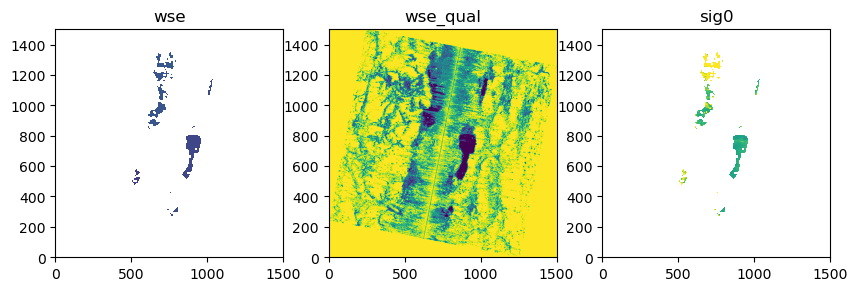

In [9]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
ax[0].imshow(raster_nc.wse, origin='lower'); ax[0].set_title('wse')
ax[1].imshow(raster_nc.wse_qual, origin='lower'); ax[1].set_title('wse_qual')
ax[2].imshow(raster_nc.sig0, vmin=-100, vmax=100, origin='lower'); ax[2].set_title('sig0')


#### 2. PIXC product (for the dianchi lake).
   

In [10]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_PIXC_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_049_198L*',
                                    bounding_box = region_dianchi
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
# earthaccess.download(links_list, dir_pixc)


In [11]:
paths_file = [os.path.join(dir_pixc, file) for file in os.listdir(dir_pixc) if 'PIXC_' in file and '.nc' in file]
pixc_nc = xr.open_dataset(paths_file[0], group='pixel_cloud')
pixc_nc


<xarray.Dataset> Size: 1GB
Dimensions:                                (points: 4694995, complex_depth: 2,
                                            num_pixc_lines: 3282)
Coordinates:
    latitude                               (points) float64 38MB ...
    longitude                              (points) float64 38MB ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 38MB ...
    range_index                            (points) float64 38MB ...
    interferogram                          (points, complex_depth) float32 38MB ...
    power_plus_y                           (points) float32 19MB ...
    power_minus_y                          (points) float32 19MB ...
    coherent_power                         (points) float32 19MB ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB ...
    data_window_first_valid                (num_pixc_lines) float64 26kB ...
    data_window_last_valid                 (num_pixc_lines) float64 26kB ...
    data_window_first_cross_track          (num_pixc_lines) float32 13kB ...
    data_window_last_cross_track           (num_pixc_lines) float32 13kB ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3282
    interferogram_size_range:    5016
    looks_to_efflooks:           1.5529205191991196
    num_azimuth_looks:           7.0
    azimuth_offset:              3

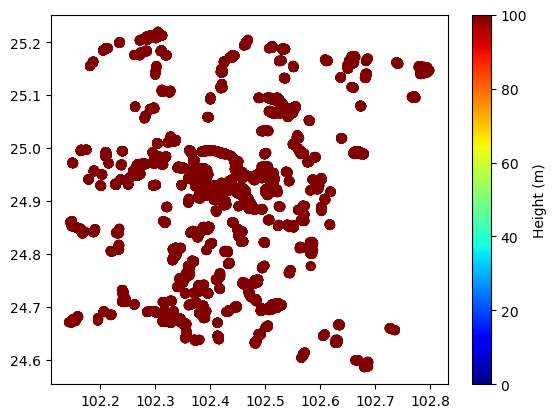

In [12]:
# mask to get good water pixels
mask = np.where(np.logical_and(pixc_nc.classification > 2, pixc_nc.geolocation_qual <= 64))
plt.scatter(x=pixc_nc.longitude[mask], y=pixc_nc.latitude[mask], c=pixc_nc.height[mask], cmap='jet')
plt.clim((0,100))
plt.colorbar().set_label('Height (m)')


#### 3. SLC product (for the dianchi lake).

In [13]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L1B_HR_SLC_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_049_198L*'
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
# earthaccess.download(links_list, dir_slc)

In [14]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_slc, file) for file in os.listdir(dir_slc) if 'HR_SLC_' in file and '.nc' in file]
print(paths_file[0])
slc_nc = xr.open_dataset(paths_file[0], group='slc')
slc_nc



data/dianchi_test/slc/SWOT_L1B_HR_SLC_011_049_198L_20240216T144659_20240216T144710_PIC0_01.nc


<xarray.Dataset> Size: 2GB
Dimensions:      (num_lines: 22976, num_pixels: 5016, complex_depth: 2)
Dimensions without coordinates: num_lines, num_pixels, complex_depth
Data variables:
    slc_plus_y   (num_lines, num_pixels, complex_depth) float32 922MB ...
    slc_minus_y  (num_lines, num_pixels, complex_depth) float32 922MB ...
    slc_qual     (num_lines) float32 92kB ...
Attributes:
    description:  Single look complex images for plus_y and minus_y channels

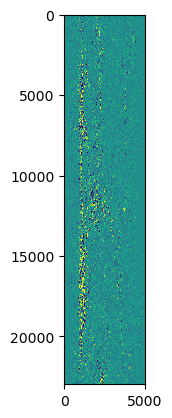

In [17]:
plt.imshow(slc_nc.slc_plus_y[:,:,0], vmax=200, vmin=-200)

#### 4. raster product (for the jinsha river).


In [30]:
links_list = []
results = earthaccess.search_data(short_name = 'SWOT_L2_HR_Raster_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_100m_*_383_101F*'
                                    )
for r in range(len(results)):
    lake_link = earthaccess.results.DataGranule.data_links(results[r], access='external')[0]
    links_list.append(lake_link)
earthaccess.download(links_list, dir_raster_jinsha)


QUEUEING TASKS | :   0%|          | 0/7 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/7 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/7 [00:00<?, ?it/s]

['data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_009_383_101F_20240117T194037_20240117T194058_PGC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_010_383_101F_20240207T162542_20240207T162603_PIC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_012_383_101F_20240320T095551_20240320T095612_PIC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_013_383_101F_20240410T064056_20240410T064117_PIC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_014_383_101F_20240501T032600_20240501T032621_PIC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_015_383_101F_20240522T001105_20240522T001126_PIC0_01.nc',
 'data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_016_383_101F_20240611T205610_20240611T205632_PIC0_01.nc']

In [33]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_raster_jinsha, file) for file in os.listdir(dir_raster_jinsha) if 'Raster_100m_' in file and '.nc' in file]
print(paths_file[0])
raster_nc = xr.open_dataset(paths_file[0])
raster_nc


data/jinsha_river/raster/SWOT_L2_HR_Raster_100m_UTM47R_N_x_x_x_012_383_101F_20240320T095551_20240320T095612_PIC0_01.nc


<xarray.Dataset> Size: 432MB
Dimensions:                  (x: 1485, y: 1484)
Coordinates:
  * x                        (x) float64 12kB 4.745e+05 4.746e+05 ... 6.229e+05
  * y                        (y) float64 12kB 2.896e+06 2.896e+06 ... 3.044e+06
Data variables: (12/39)
    crs                      object 8B ...
    longitude                (y, x) float64 18MB ...
    latitude                 (y, x) float64 18MB ...
    wse                      (y, x) float32 9MB ...
    wse_qual                 (y, x) float32 9MB ...
    wse_qual_bitwise         (y, x) float64 18MB ...
    ...                       ...
    load_tide_fes            (y, x) float32 9MB ...
    load_tide_got            (y, x) float32 9MB ...
    pole_tide                (y, x) float32 9MB ...
    model_dry_tropo_cor      (y, x) float32 9MB ...
    model_wet_tropo_cor      (y, x) float32 9MB ...
    iono_cor_gim_ka          (y, x) float32 9MB ...
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-03-24T02:19:35Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         474500.0
    x_max:                         622900.0
    y_min:                         2895800.0
    y_max:                         3044100.0
    institution:                   CNES
    product_version:               01

Text(0.5, 1.0, 'sig0')

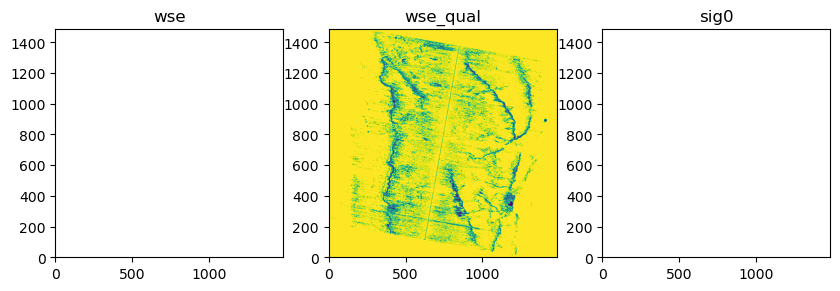

In [39]:
fig, ax = plt.subplots(1,3, figsize=(10, 3))
ax[0].imshow(raster_nc.wse, origin='lower'); ax[0].set_title('wse')
ax[1].imshow(raster_nc.wse_qual, origin='lower'); ax[1].set_title('wse_qual')
ax[2].imshow(raster_nc.sig0, vmin=-100, vmax=100, origin='lower'); ax[2].set_title('sig0')



#### 5. PIXC product (for the jinsha river).


In [18]:
links_list = []
results = earthaccess.search_data(short_name = 'SWOT_L2_HR_PIXC_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_383_202R*',
                                    )
for r in range(len(results)):
    link = earthaccess.results.DataGranule.data_links(results[r], access='external')[0]
    links_list.append(link)
print(len(links_list))
# earthaccess.download(links_list, dir_pixc_jinsha)


7


In [19]:
paths_file = [os.path.join(dir_pixc_jinsha, file) for file in os.listdir(dir_pixc_jinsha) if 'PIXC_' in file and '.nc' in file]
pixc_nc = xr.open_dataset(paths_file[0], group='pixel_cloud')
pixc_nc


<xarray.Dataset> Size: 934MB
Dimensions:                                (points: 3383490, complex_depth: 2,
                                            num_pixc_lines: 3285)
Coordinates:
    latitude                               (points) float64 27MB ...
    longitude                              (points) float64 27MB ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 27MB ...
    range_index                            (points) float64 27MB ...
    interferogram                          (points, complex_depth) float32 27MB ...
    power_plus_y                           (points) float32 14MB ...
    power_minus_y                          (points) float32 14MB ...
    coherent_power                         (points) float32 14MB ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB ...
    data_window_first_valid                (num_pixc_lines) float64 26kB ...
    data_window_last_valid                 (num_pixc_lines) float64 26kB ...
    data_window_first_cross_track          (num_pixc_lines) float32 13kB ...
    data_window_last_cross_track           (num_pixc_lines) float32 13kB ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3285
    interferogram_size_range:    6395
    looks_to_efflooks:           1.554334966739449
    num_azimuth_looks:           7.0
    azimuth_offset:              3

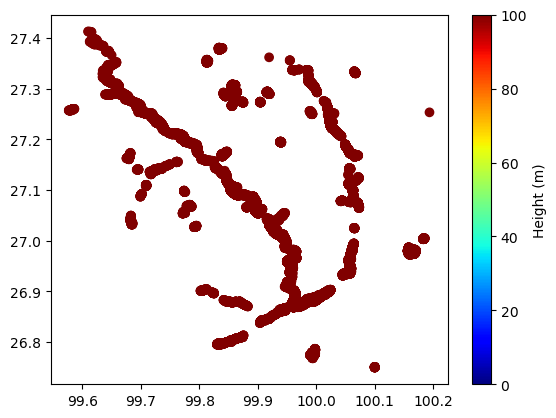

In [47]:
# mask to get good water pixels
mask = np.where(np.logical_and(pixc_nc.classification > 2, pixc_nc.geolocation_qual <= 64))
plt.scatter(x=pixc_nc.longitude[mask], y=pixc_nc.latitude[mask], c=pixc_nc.height[mask], cmap='jet')
plt.clim((0,100))
plt.colorbar().set_label('Height (m)')
